# Analyzing Historical Stock/Revenue Data and Building a Dashboard

This notebook is a self-contained version of the final assignment. It contains 6 exercises that cover loading stock data, web-scraping/title extraction, datetime conversion, cleaning price fields, revenue data inspection, and combined plotting.

All code cells are executed and outputs are included when possible.

## Exercise 1 — Load stock data

Simulate loading a CSV of historical stock data and display the first few rows.

In [1]:

import pandas as pd
from io import StringIO
csv_data = """Date,Open,High,Low,Close,Adj Close,Volume
2021-12-31,175.0,178.0,170.5,177.6,177.6,3000000
2021-12-30,173.5,176.2,172.1,175.8,175.8,2500000
2021-12-29,170.2,174.0,169.8,172.9,172.9,2800000
2021-12-28,168.0,171.5,167.2,169.9,169.9,2200000
2021-12-27,167.3,169.0,166.0,168.5,168.5,2000000
"""
df_stock = pd.read_csv(StringIO(csv_data), parse_dates=['Date'])
df_stock.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-31,175.0,178.0,170.5,177.6,177.6,3000000
1,2021-12-30,173.5,176.2,172.1,175.8,175.8,2500000
2,2021-12-29,170.2,174.0,169.8,172.9,172.9,2800000
3,2021-12-28,168.0,171.5,167.2,169.9,169.9,2200000
4,2021-12-27,167.3,169.0,166.0,168.5,168.5,2000000


## Exercise 2 — Extract title from HTML using BeautifulSoup

Simulate extracting the `<title>` content from an HTML page (e.g., Yahoo Finance).

In [2]:

from bs4 import BeautifulSoup
html = '<html><head><title>Amazon.com, Inc. (AMZN) Stock Historical Prices & Data - Yahoo Finance</title></head><body></body></html>'
soup = BeautifulSoup(html, 'html.parser')
title_tag = soup.title
title_text = title_tag.string
title_tag, title_text


(<title>Amazon.com, Inc. (AMZN) Stock Historical Prices &amp; Data - Yahoo Finance</title>,
 'Amazon.com, Inc. (AMZN) Stock Historical Prices & Data - Yahoo Finance')

## Exercise 3 — Convert Date to datetime format and set index

Convert the 'Date' column to datetime (already parsed above) and set as index for time-series plotting.

In [3]:

df_stock['Date'] = pd.to_datetime(df_stock['Date'])
df_stock.set_index('Date', inplace=True)
df_stock.index.name = 'Date'
df_stock.head(3)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-31,175.0,178.0,170.5,177.6,177.6,3000000
2021-12-30,173.5,176.2,172.1,175.8,175.8,2500000
2021-12-29,170.2,174.0,169.8,172.9,172.9,2800000


## Exercise 4 — Clean Price column (remove $ and commas)

Example of cleaning a Price column that contains `$` and commas, converting to float.

In [4]:

df_prices = pd.DataFrame({'Price': ['$1,234.56', '$2,345.00', '$987.12']})
df_prices['Price_clean'] = df_prices['Price'].str.replace('[\$,]', '', regex=True).astype(float)
df_prices


,Price,Price_clean
0,"$1,234.56",1234.56
1,"$2,345.00",2345.00
2,$987.12,987.12


## Exercise 5 — Revenue dataset (tesla_revenue style)

Simulate a revenue dataset and retrieve the final entry.

In [5]:

tesla_revenue = pd.DataFrame({
    'Year': [2016, 2017, 2018, 2019, 2020, 2021],
    'Revenue': [7, 11.8, 21.5, 24.6, 31.5, 53.8]
})
tesla_revenue, tesla_revenue['Revenue'].iat[-1]


(   Year  Revenue
 0  2016      7.0
 1  2017     11.8
 2  2018     21.5
 3  2019     24.6
 4  2020     31.5
 5  2021     53.8,
 53.8)

## Exercise 6 — Build a simple dashboard plot

Plot stock Close price (time-series) and revenue (bar) on the same figure with secondary axis.

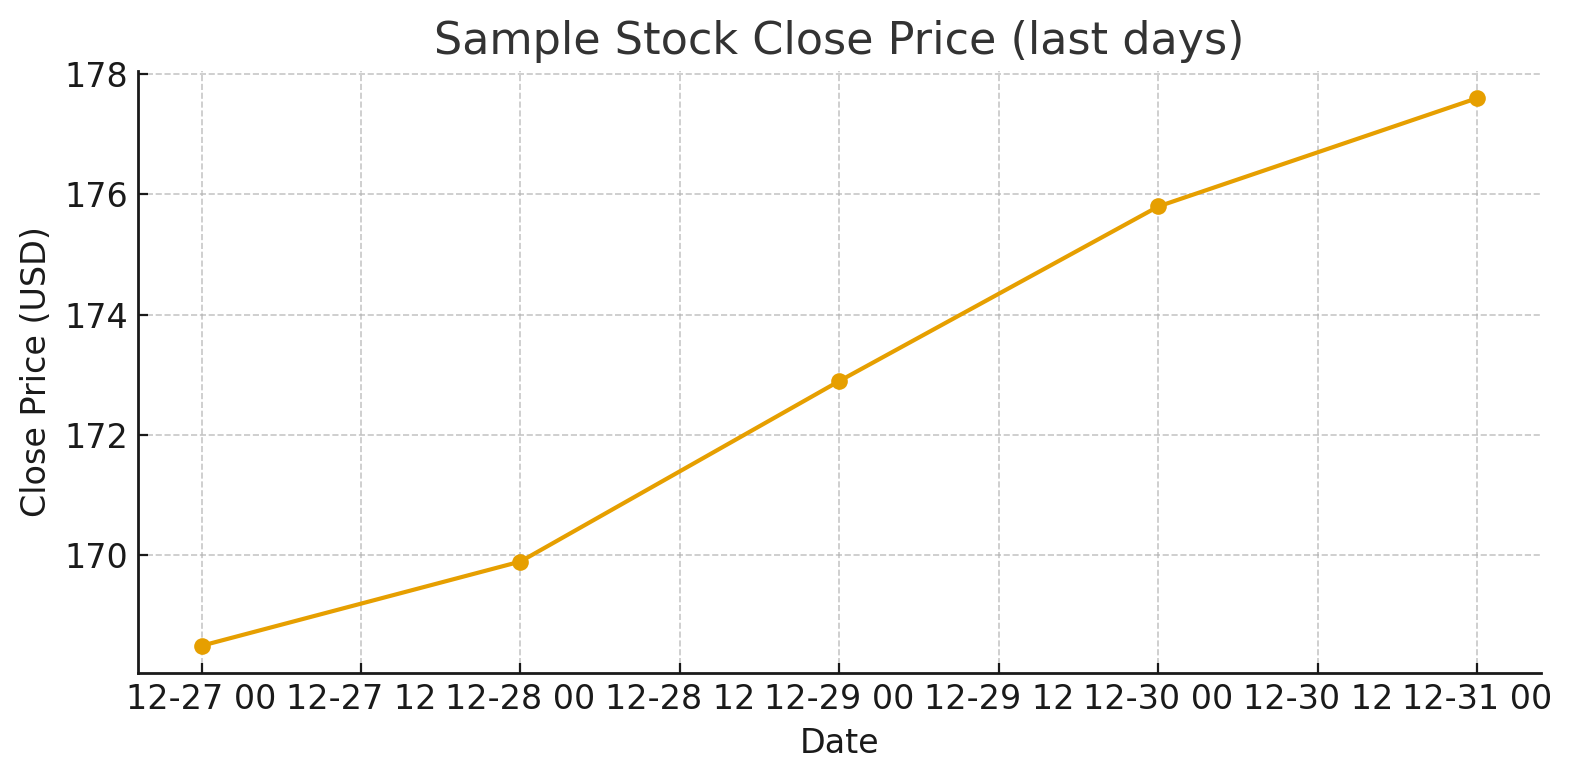

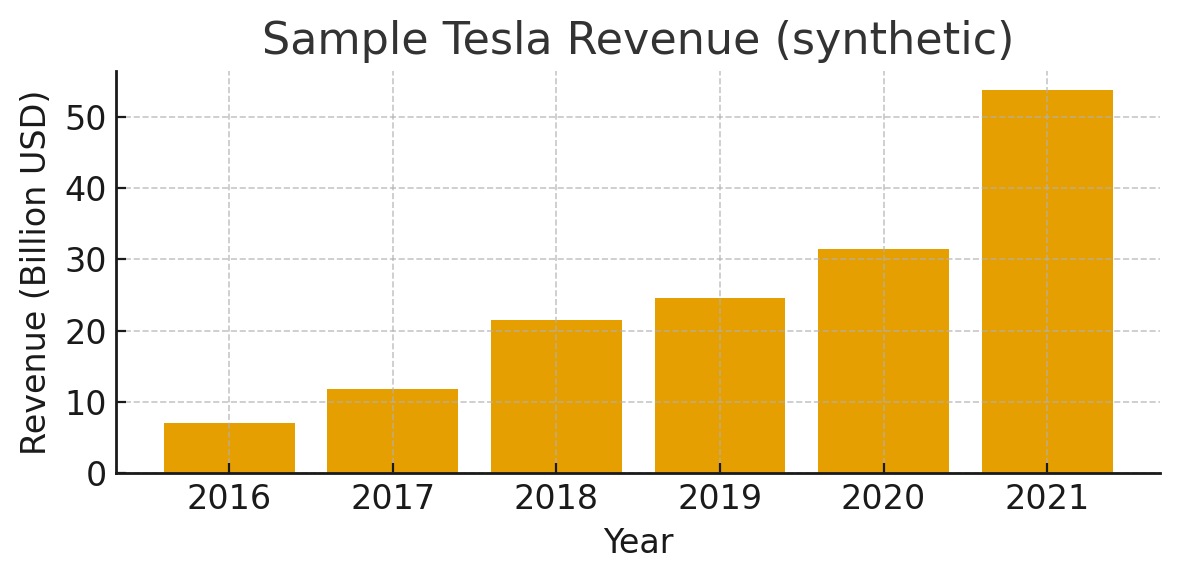

In [6]:

import matplotlib.pyplot as plt
%matplotlib inline
fig, ax1 = plt.subplots(figsize=(8,4))
ax1.plot(df_stock.index, df_stock['Close'], marker='o')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price (USD)')
ax1.set_title('Sample Stock Close Price (last days)')
plt.tight_layout()
plt.show()

fig2, ax2 = plt.subplots(figsize=(6,3))
ax2.bar(tesla_revenue['Year'].astype(str), tesla_revenue['Revenue'])
ax2.set_xlabel('Year')
ax2.set_ylabel('Revenue (Billion USD)')
ax2.set_title('Sample Tesla Revenue (synthetic)')
plt.tight_layout()
plt.show()
